In [127]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale


In [71]:
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_blobs

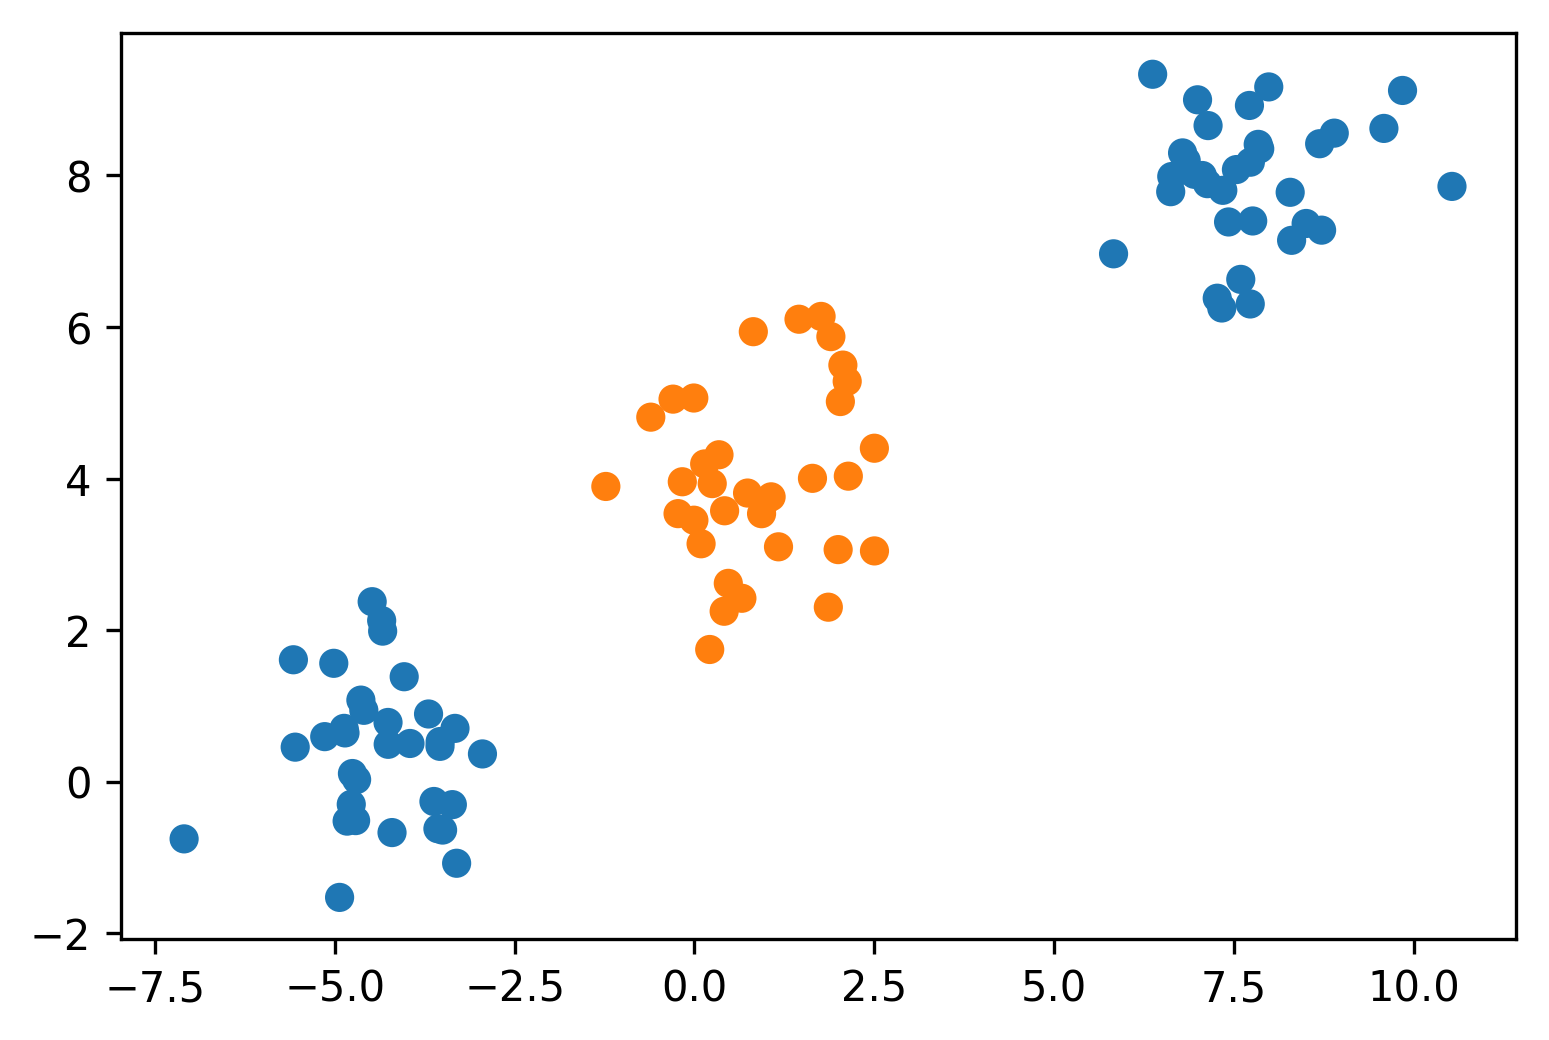

In [162]:
X, y = make_blobs(random_state=3)
y = (y == 0).astype(np.int)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))

In [147]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)

In [148]:
X.shape, X_poly.shape

((100, 2), (100, 5))

In [149]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [150]:
linear_svm = SVC(kernel="linear", C=1).fit(X_poly, y)
poly_svm = SVC(kernel="poly", degree=2, coef0=1).fit(X, y)

In [151]:
linear_svm.coef_

array([[ 0.139,  0.06 , -0.201,  0.048,  0.019]])

In [152]:
linear_svm.dual_coef_

array([[-0.03 , -0.003,  0.003,  0.03 ]])

In [153]:
linear_svm.support_

array([ 1, 26, 42, 62], dtype=int32)

In [154]:
poly_svm.dual_coef_

array([[-0.057, -0.   , -0.012,  0.008,  0.062]])

In [155]:
poly_svm.support_

array([ 1, 26, 41, 42, 62], dtype=int32)

In [156]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X[:, 0].min() - .5, X[:, 0].max() + .5, 1000)
y_lin = np.linspace(X[:, 1].min() - .5, X[:, 1].max() + .5, 1000)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

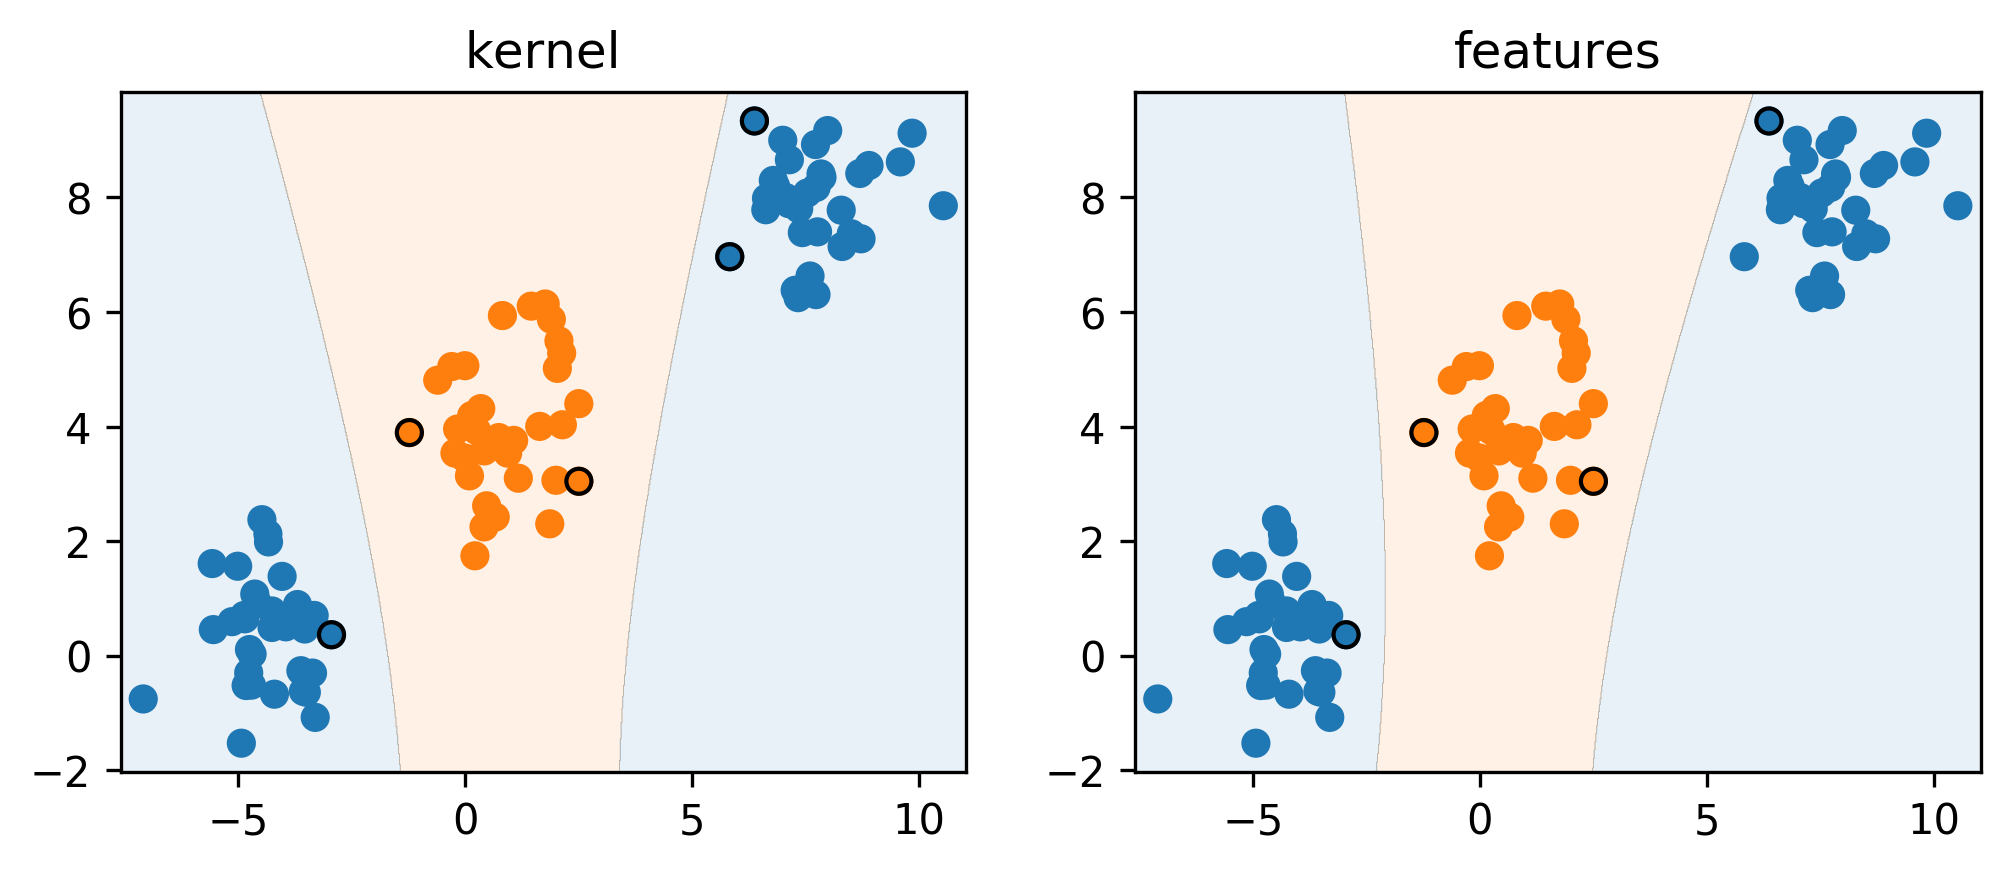

In [157]:
colors = [plt.cm.Vega10(0), plt.cm.Vega10(0), plt.cm.Vega10(1), plt.cm.Vega10(1)]
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for ax, model, name in zip(axes, [poly_svm, make_pipeline(poly, linear_svm)], ["kernel", "features"]):
    ax.set_title(name)
    support_vectors = getattr(model, "support_", None)
    if support_vectors is None:
        support_vectors = model.steps[1][1].support_
    predictions = model.predict(X_grid)
    ax.contourf(x_grid, y_grid, predictions.reshape(x_grid.shape), alpha=.1, colors=colors)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y))
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], facecolor='none', edgecolor='k', linewidths=1)
    ax.set_xlim(x_lin[0], x_lin[-1])
    ax.set_ylim(y_lin[0], y_lin[-1])

In [163]:
X, y = make_blobs(n_samples=10000, random_state=0)
y = (y == 0).astype(np.int)
%timeit SVC(kernel="poly", degree=2, coef0=1).fit(X, y)

KeyboardInterrupt: 